In [68]:
import keras
from keras import models
import os
import pandas as pd
from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

EXAM_SLICE = 100
width = 512
height = 512

Carregando a rede neural treinada

In [3]:
model_folder = './model_1'

model = models.load_model(model_folder)

Mostrando exemplo de fatia de pulmao de paciente com pulmao normal

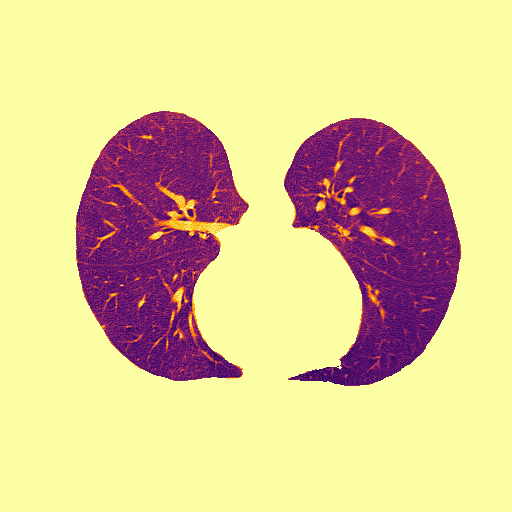

In [72]:
image_filename = '../patients_examples/001/-slice126..png'
from IPython.display import Image
img = Image(filename=image_filename)
display(img)

Mostrando exemplo de fatia de pulmao de paciente com Covid Tipico

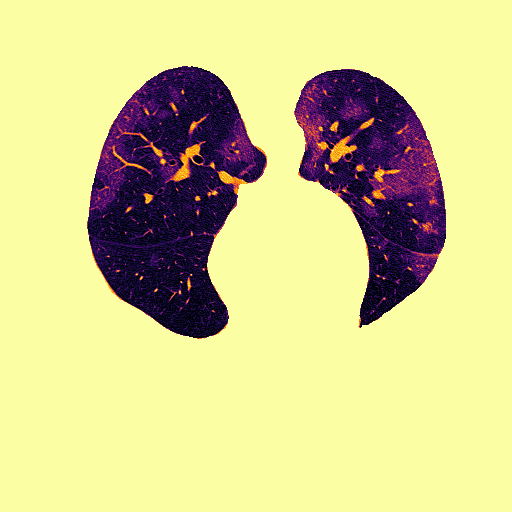

In [28]:
image_filename = '../patients_examples/C33/-slice191..png'
from IPython.display import Image
img = Image(filename=image_filename)
display(img)

In [74]:
def predictions_by_patient(model, patients):
	results = []
	for p in patients:
		if p[:4] == '001':
			curr_dir = '../patients_examples/001/'
		else:
			curr_dir = '../patients_examples/C33/'
		imgs_filename = sorted(os.listdir(curr_dir))
		test_filenames = imgs_filename[(len(imgs_filename)-EXAM_SLICE)//2:(len(imgs_filename)+EXAM_SLICE)//2]
		test_df = pd.DataFrame({
                	'filename': test_filenames
		})
		nb_samples = test_df.shape[0]

		test_gen = ImageDataGenerator(rescale=1./255)
		test_generator = test_gen.flow_from_dataframe(
                	test_df, 
                	curr_dir, 
               		x_col='filename',
                	y_col=None,
                	class_mode=None,
                	target_size=(width, height),
                	batch_size=16,
                	shuffle=False
		)

		predict = model.predict(test_generator, steps=np.ceil(nb_samples/16))
		test_df['category'] = [int(round(p[0])) for p in predict]
		results.append(test_df)

	for i,test_df in enumerate(results):
		print('Patient number: ', patients[i])
		if os.path.isfile('../patients_examples/covid_others_cv.npy'):
			print('loading label legend file')
			class_indices = np.load('../patients_examples/covid_others_cv.npy', allow_pickle=True).item()
			class_indices = dict((v,k) for k,v in class_indices.items())
			test_df['category'] = test_df['category'].replace(class_indices)
		print(test_df['category'].value_counts())
		print('')
		#test_df.to_csv('teste.csv')

Realizando a Predição de 100 fatias de cada um dos 2 pacientes

In [75]:
test_patients = ['C33', '001']
predictions_by_patient(model, test_patients)

Found 100 validated image filenames.
Found 100 validated image filenames.
Patient number:  C33
loading label legend file
typical    100
Name: category, dtype: int64

Patient number:  001
loading label legend file
negative    100
Name: category, dtype: int64

